In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


D:\Projects\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

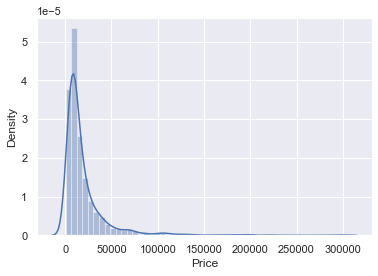

In [8]:
sns.distplot(data_no_mv['Price'])

In [9]:
q = data_no_mv['Price'].quantile(0.99)

In [10]:
data_1 = data_no_mv[data_no_mv['Price']<q]


In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]


In [12]:
data_3 = data_2[data_2['EngineV']<6.65]


D:\Projects\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

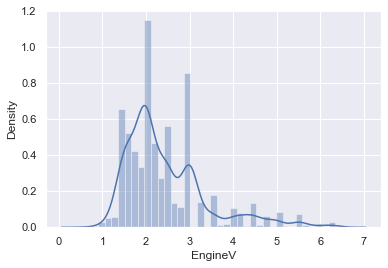

In [13]:
sns.distplot(data_3['EngineV'])

In [14]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]


In [15]:
data_cleaned = data_4.reset_index(drop=True)

In [16]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


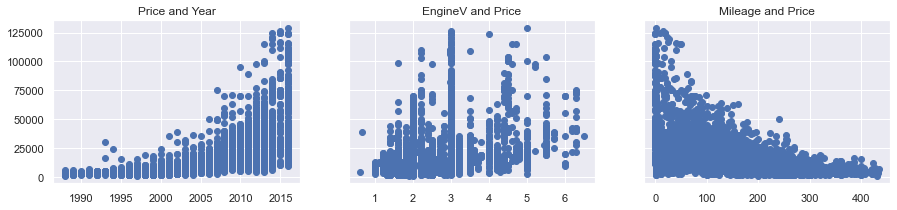

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

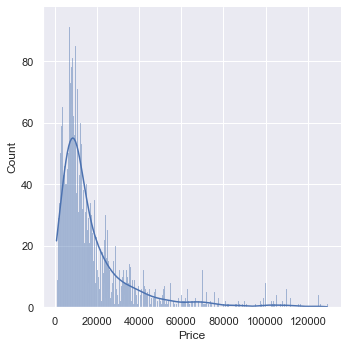

In [18]:
sns.displot(data_cleaned['Price'], kde=True, binwidth=300)

In [19]:
log_price = np.log(data_cleaned['Price'])

In [20]:
data_cleaned['log_price'] = log_price

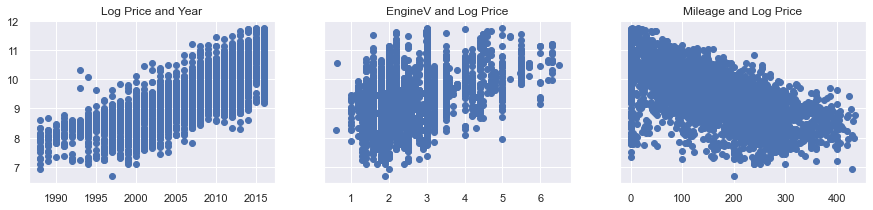

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('EngineV and Log Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Mileage and Log Price')

plt.show()

In [22]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [23]:
## Using VIF from statsmodels to check for MULTICOLINEARITY i.e the variables year and mileage would be correlated

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

In [25]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [26]:
vif

,VIF,Features
0,3.792300,Mileage
1,10.332226,Year
2,7.638286,EngineV


#### 1 < VIF < 5: generally okay
#### VIF > 5~10: could be unacceptable
#### in this case: year is unacceptable, too high

In [27]:
data_no_mcol = data_cleaned.drop(['Year'], axis=1) #mcol is multicolinearity

In [29]:
data_with_dummies = pd.get_dummies(data_no_mcol, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [34]:
variables = data_with_dummies

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.459187,Mileage
1,13.393242,EngineV
2,41.900238,log_price
3,2.603923,Brand_BMW
4,3.087845,Brand_Mercedes-Benz
5,1.830195,Brand_Mitsubishi
6,2.281020,Brand_Renault
7,2.406538,Brand_Toyota
8,3.312370,Brand_Volkswagen
9,1.582897,Body_hatch


In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [39]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Regression


In [41]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
scaler.fit(inputs)

StandardScaler()

In [50]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split 

In [47]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 42)

### Create Regression

In [59]:
reg = LinearRegression()

In [63]:
reg.fit(x_train, y_train)

LinearRegression()

In [66]:
yhat = reg.predict(x_train)

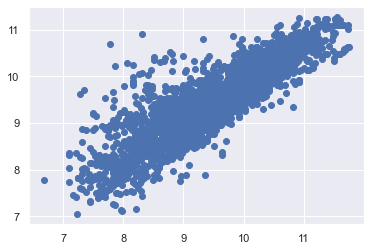

In [69]:
plt.scatter(y_train, yhat)
plt.show()

D:\Projects\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

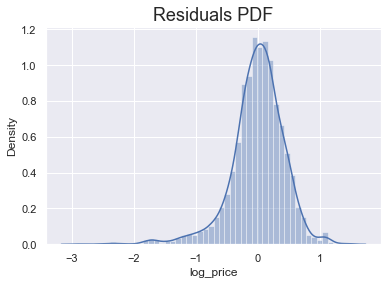

In [78]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF", size = 18)

In [80]:
reg.score(x_train, y_train)

0.7497845242593033

In [81]:
## Weights and Biases

In [82]:
reg.coef_

array([-0.46357571,  0.21290679,  0.01721578,  0.01224818, -0.13354087,
       -0.18162501, -0.057883  , -0.09120701, -0.14713945, -0.09854788,
       -0.1915801 , -0.11891026, -0.16021817, -0.11962215, -0.03137988,
       -0.14687913,  0.30869234])

In [83]:
reg.intercept_

9.413175707783935

In [86]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.463576
1,EngineV,0.212907
2,Brand_BMW,0.017216
3,Brand_Mercedes-Benz,0.012248
4,Brand_Mitsubishi,-0.133541
5,Brand_Renault,-0.181625
6,Brand_Toyota,-0.057883
7,Brand_Volkswagen,-0.091207
8,Body_hatch,-0.147139
9,Body_other,-0.098548


In [87]:
data_cleaned['Brand'].unique() # if weight of brand is positive then it's more expensive the Audi, else cheaper

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### if weight of brand is positive then it's more expensive than Audi, else cheaper

## Testing

In [88]:
yhat_test = reg.predict(x_test)

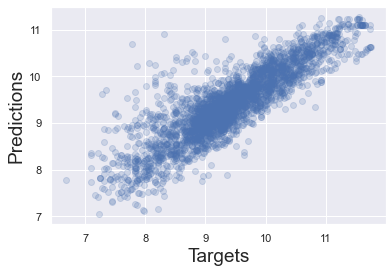

In [95]:
plt.scatter(y_train, yhat, alpha = 0.2)
plt.xlabel('Targets', size = 19)
plt.ylabel('Predictions', size = 19)
plt.show()

In [98]:
#dataframe performance 
df_perf = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_perf.head()

,Prediction
0,33014.854766
1,7950.696916
2,44388.797214
3,3178.950774
4,7012.256891


In [101]:
y_test = y_test.reset_index(drop=True)

df_perf['Target'] = np.exp(y_test)
df_perf.head()

,Prediction,Target
0,33014.854766,24500.0
1,7950.696916,8900.0
2,44388.797214,69900.0
3,3178.950774,7000.0
4,7012.256891,5400.0


In [110]:
df_perf["Residual (Difference)"] = df_perf['Target'] - df_perf['Prediction']
df_perf["Residual %"] = np.abs(df_perf['Residual (Difference)'] / df_perf['Target'] * 100)
df_perf.head()

,Prediction,Target,Residual (Difference),Residual %
0,33014.854766,24500.0,-8514.854766,34.754509
1,7950.696916,8900.0,949.303084,10.666327
2,44388.797214,69900.0,25511.202786,36.496714
3,3178.950774,7000.0,3821.049226,54.586418
4,7012.256891,5400.0,-1612.256891,29.856609


In [111]:
df_perf.describe()

,Prediction,Target,Residual (Difference),Residual %
count,774.000000,774.000000,774.000000,774.000000
mean,16411.346348,18841.112041,2429.765693,37.379993
std,13312.236129,20314.008413,11345.390848,75.459568
min,995.178871,999.000000,-34419.599515,0.016567
25%,7556.244028,6999.000000,-1901.764840,10.890130
50%,11777.964527,11931.000000,205.174614,24.024778
75%,20706.696534,22375.000000,3816.389795,41.862602
max,75399.481799,129222.000000,82377.092394,1286.203367


In [117]:
pd.options.display.max_rows = 999
df_perf.sort_values(by=['Residual %'])

,Prediction,Target,Residual (Difference),Residual %
280,1949.676939,1950.00,0.323061,0.016567
40,12489.749967,12500.00,10.250033,0.082000
387,13562.360760,13600.00,37.639240,0.276759
79,21256.040623,21335.00,78.959377,0.370093
277,24912.214453,24800.00,-112.214453,0.452478
738,32241.512457,32400.00,158.487543,0.489159
251,28749.036120,28900.00,150.963880,0.522366
314,35693.588817,35500.00,-193.588817,0.545321
427,9061.151072,9000.00,-61.151072,0.679456
224,10874.728918,10800.00,-74.728918,0.691934
